**Setup folders**

In [10]:
import os

In [18]:
fine_tuned_model_name = "ssd_mobnet_model"
pretrained_model_name = "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8"
pretrained_model_url = "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz"
tf_record_script_name = "generate_tfrecord.py"
label_map_name = "label_map.pbtxt"

In [19]:
paths = {
    "workspace_path": os.path.join("Tensorflow", "workspace"),
    "scripts_path": os.path.join("Tensorflow", "scripts"),
    "API_model_path": os.path.join("Tensorflow", "models"),
    'annotation_path': os.path.join('Tensorflow', 'workspace','annotations'),
    'image_path': os.path.join('Tensorflow', 'workspace','images'),
    'model_path': os.path.join('Tensorflow', 'workspace','models'),
    'pretrained_model_path': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'chechpoint_path': os.path.join("Tensorflow", "workspace", "models", fine_tuned_model_name),
    'output_path': os.path.join("Tensorflow", "workspace", "models", fine_tuned_model_name, "export"),
    'tfsj_path': os.path.join("Tensorflow", "workspace", "models", fine_tuned_model_name, 'tfsj_export'),
    'tflite_path': os.path.join("Tensorflow", "workspace", "models", fine_tuned_model_name, 'tflite_export'),
    'protoc_path': os.path.join("Tensorflow", "protoc")
    
}

In [20]:
files = {
    'pipeline_config': os.path.join('Tensorflow', 'workspace', 'models', fine_tuned_model_name, 'pipeline.config'),
    'tf_record_script': os.path.join(paths['scripts_path'], tf_record_script_name),
    'label_map': os.path.join(paths['annotation_path'], label_map_name)
    
}

In [38]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == "posix":
            !mkdir -p {path}
        if os.name == "nt":
            !mkdir {path}

**Install TFOD and download Pretrained model**

In [5]:
# install wget for windows only
if os.name == "nt":
    !pip install wget
    import wget

In [24]:
# clone tensorflow models github
if not os.path.exists(os.path.join(paths['API_model_path'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['API_model_path']}

In [ ]:
# install tensorflow object detection
if os.name == "posix":
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

if os.name == 'nt':
    url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['protoc_path']}
    !cd {paths['protoc_path']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['protoc_path'], 'bin'))
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e .

In [29]:
verification_script = os.path.join(paths['API_model_path'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# verify installation and all required packages are installed
!python {verification_script}

2021-08-02 14:02:14.332610: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
Running tests under Python 3.8.10: C:\Users\SamirGouda\Desktop\object_detection\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-08-02 14:02:21.903515: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2021-08-02 14:02:22.385897: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: GeForce GT 740M computeCapability: 3.5
coreClock: 1.0325GHz coreCount: 2 deviceMemorySize: 2.00GiB deviceMemoryBandwidth: 13.41GiB/s
2021-08-02 14:02:22.385959: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library cudart64_101.dll
2021-08-02 14:02:22.469356: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened 

I0802 14:02:32.756389  4376 efficientnet_model.py:147] round_filter input=32 output=32
I0802 14:02:32.786415  4376 efficientnet_model.py:147] round_filter input=32 output=32
I0802 14:02:32.787401  4376 efficientnet_model.py:147] round_filter input=16 output=16
I0802 14:02:32.873394  4376 efficientnet_model.py:147] round_filter input=16 output=16
I0802 14:02:32.873394  4376 efficientnet_model.py:147] round_filter input=24 output=24
I0802 14:02:33.131396  4376 efficientnet_model.py:147] round_filter input=24 output=24
I0802 14:02:33.131396  4376 efficientnet_model.py:147] round_filter input=40 output=40
I0802 14:02:33.387414  4376 efficientnet_model.py:147] round_filter input=40 output=40
I0802 14:02:33.387414  4376 efficientnet_model.py:147] round_filter input=80 output=80
I0802 14:02:34.014396  4376 efficientnet_model.py:147] round_filter input=80 output=80
I0802 14:02:34.014396  4376 efficientnet_model.py:147] round_filter input=112 output=112
I0802 14:02:34.456392  4376 efficientnet_

In [14]:
# import tensorflow object detection
import object_detection

In [7]:
# clone pretrained model
if os.name == "posix":
    !wget {pretrained_model_url}
    !mv {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}
    
if os.name == "nt":
    wget.download(pretrained_model_url)
    !move {pretrained_model_name+'.tar.gz'} {paths['pretrained_model_path']}
    !cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [43]:
!cd {paths['pretrained_model_path']} && tar -zxvf {pretrained_model_name+'.tar.gz'}

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


**create label map**

In [8]:
labels = [{'name':'ThumbsUp', 'id':1},{'name':'ThumbsDown', 'id':2}, {'name':'LiveLong', 'id':3}, {'name':'ThankYou', 'id':4}]

with open(files['label_map'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}'.format(label['id']))
        f.write('}\n')

**create tf records**

In [35]:
# clone tf records package
if not os.path.exists(files['tf_record_script']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['scripts_path']}

In [36]:
# create tf records of both train and test sets
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'train')} -l {files['label_map']} -o {os.path.join(paths['annotation_path'], 'train.record')}
!python {files['tf_record_script']} -x {os.path.join(paths['image_path'], 'test')} -l {files['label_map']} -o {os.path.join(paths['annotation_path'], 'test.record')}

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


**copy model config to training folder**

In [44]:
if os.name == "posix":
    !cp {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['chechpoint_path'])}
if os.name == "nt":
    !copy {os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'pipeline.config')} {os.path.join(paths['chechpoint_path'])}

        1 file(s) copied.


**update config for current object detection (transfer learning)**

In [15]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [16]:
config = config_util.get_configs_from_pipeline_file(files['pipeline_config'])

In [49]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [45]:
# create pipeline config file
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
# change the format to current pretrained pipeline format
with tf.io.gfile.GFile(files['pipeline_config'], 'r') as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [46]:
# modify pipeline configuration for the required task
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['pretrained_model_path'], pretrained_model_name, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = 'detection'
pipeline_config.train_input_reader.label_map_path = files['label_map']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['label_map']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['annotation_path'], 'test.record')]


In [47]:
# apply modification to pretrained pipeline config
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['pipeline_config'], 'wb') as f:
    f.write(config_text)

**train the model**

In [ ]:
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" to train on CPU
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [6]:
training_script = os.path.join(paths['API_model_path'], 'research', 'object_detection', 'model_main_tf2.py')
train_command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=100".format(training_script, paths['chechpoint_path'], files['pipeline_config'])
print(train_command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=100


In [ ]:
!{train_command}

**evaluate the model**

In [7]:
eval_command = "python {} --model_dir={} --pipeline_config_path={} --chechpoint_dir={}".format(training_script, paths['chechpoint_path'], files['pipeline_config'], paths['chechpoint_path'])
print(eval_command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --chechpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [ ]:
!{eval_command}

**TensorBoard**

In [9]:
!cd {os.path.join(paths['chechpoint_path'], 'eval')} && tensorboard --logdir=.

^C


**load model from checkpoint**

In [17]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [21]:
# load pipeline and build detection model
configs = config_util.get_configs_from_pipeline_file(files['pipeline_config'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['chechpoint_path'], 'ckpt-4')).expect_partial()

# create detection function
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

**detect from an image**

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
category_index = label_map_util.create_category_index_from_labelmap(files['label_map'])

In [32]:
image_path = os.path.join(paths['image_path'], 'test', 'thumbsup.fcfe6974-f135-11eb-99c0-fcf8aec479cf.jpg')

In [47]:
img = cv2.imread(image_path)
image_np = np.array(img)
image_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(image_tensor)
for key, value in detections.items():
    print(value)
    print(value[0, :2].numpy())

tf.Tensor(
[[[0.55467594 0.12547599 0.9810759  0.45505804]
  [0.54040074 0.11930551 0.9780624  0.38426352]
  [0.8520589  0.37137356 0.9903277  0.90463436]
  [0.6836269  0.47060394 0.98321044 1.        ]
  [0.04315689 0.08071655 0.5396838  0.9105957 ]
  [0.93767333 0.60332036 1.         0.85754836]
  [0.85623425 0.05963668 0.98730713 0.58092785]
  [0.7926356  0.55812895 0.9812171  1.        ]
  [0.9366643  0.6687046  0.99943846 0.94520843]
  [0.60555744 0.32759616 0.6978235  0.5480511 ]
  [0.6733974  0.14151913 1.         0.8914408 ]
  [0.59865004 0.1348469  0.99082965 0.48863158]
  [0.9320932  0.8072614  1.         1.        ]
  [0.8534235  0.1801104  0.9938836  0.70190895]
  [0.63256633 0.32514313 0.71246195 0.5544774 ]
  [0.6006402  0.60231686 0.98191106 0.86248624]
  [0.9556166  0.6553222  0.9996885  0.8595811 ]
  [0.6161479  0.68532    0.99614644 1.        ]
  [0.95545596 0.7104103  0.9981682  0.90995985]
  [0.8767206  0.67729235 1.         0.84087837]
  [0.5915663  0.11616218 0.99

InvalidArgumentError: Index out of range using input dim 1; input has only 1 dims [Op:StridedSlice] name: strided_slice/

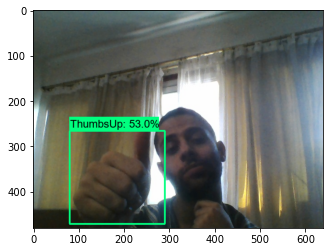

In [53]:
img = cv2.imread(image_path)
image_np = np.array(img)
image_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(image_tensor)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() 
               for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
img_np_with_detections = np.copy(image_np)
viz_utils.visualize_boxes_and_labels_on_image_array(
                    img_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=0.4,
                    agnostic_mode=False)
plt.imshow(cv2.cvtColor(img_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

**real time detection from webcam**

In [ ]:
cap = cv2.VideoCapture(0)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)
    image_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(image_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key:value[0, :num_detections].numpy() 
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    label_id_offset = 1
    img_np_with_detections = np.copy(image_np)
    viz_utils.visualize_boxes_and_labels_on_image_array(
                    img_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes'],
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=0.8,
                    agnostic_mode=False)
    cv2.imshow('object detection', cv2.resize(img_np_with_detections, (width,height)))
    
    if cv2.waitKey(1) && 0XFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

**freezing the graph**

In [72]:
freeze_script = os.path.join(paths['API_model_path'], 'research', 'object_detection', 'exporter_main_v2.py')
freeze_command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint={} --output_directory={}".format(freeze_script, files['pipeline_config'], paths['chechpoint_path'], paths['output_path'])
print(freeze_command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\ssd_mobnet_model\pipeline.config --trained_checkpoint=Tensorflow\workspace\models\ssd_mobnet_model --output_directory=Tensorflow\workspace\models\ssd_mobnet_model\export
